In [31]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [32]:
x_train = np.loadtxt('data\input.csv', delimiter = ',')
y_train = np.loadtxt('data\labels.csv', delimiter = ',')   
x_test = np.loadtxt('data\input_test.csv', delimiter = ',')
y_test = np.loadtxt('data\labels_test.csv', delimiter = ',')

In [34]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

x_train = x_train/255.0
x_test = x_test/255.0

In [36]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


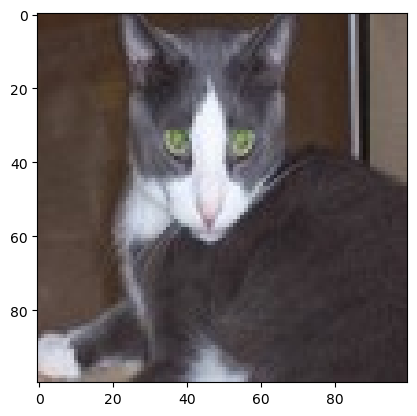

In [39]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx])
plt.show()

In [40]:
model = Sequential([

Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
MaxPooling2D((2,2)),

Conv2D(32, (3,3), activation = 'relu'),
MaxPooling2D((2,2)),

Flatten(),
Dense(64, activation = 'relu'),
Dense(1, activation = 'sigmoid')
    
    ])

In [41]:
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [43]:
model.fit(x_train,y_train,batch_size=64,epochs=5)

Epoch 1/5


32/32 [==============================] - 7s 188ms/step - loss: 0.7079 - accuracy: 0.4975
Epoch 2/5
32/32 [==============================] - 6s 183ms/step - loss: 0.6616 - accuracy: 0.5965
Epoch 3/5
32/32 [==============================] - 6s 180ms/step - loss: 0.6058 - accuracy: 0.6695
Epoch 4/5
32/32 [==============================] - 6s 183ms/step - loss: 0.5414 - accuracy: 0.7385
Epoch 5/5
32/32 [==============================] - 6s 187ms/step - loss: 0.5284 - accuracy: 0.7370


In [44]:
loss, accuracy = model.evaluate(x_test, y_test)

13/13 [==============================] - 1s 25ms/step - loss: 0.5746 - accuracy: 0.7025


In [45]:
print(f"Loss : {loss}")
print(f"Accuracy : {accuracy}")

Loss : 0.5746481418609619
Accuracy : 0.7024999856948853


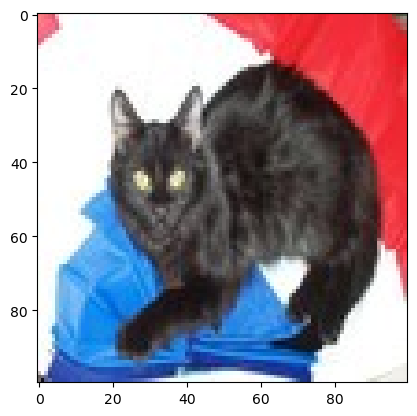

1/1 [==============================] - 0s 24ms/step
Model Says its a : cat


In [80]:
idx2 = random.randint(0,len(x_test))
plt.imshow(x_test[idx2])
plt.show()

y_pred = model.predict(x_test[idx2].reshape(1,100,100,3))
y_pred = y_pred>0.5

if(y_pred ==0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Model Says its a :", pred)